一般用numpy表示向量，其提供了许多包装好的函数

1. 向量的可视化

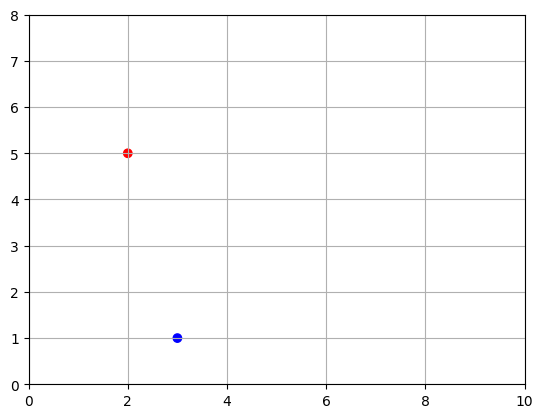

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])
x_coor, y_coor = zip(u, v)
plt.scatter(x_coor, y_coor, color=["red", "blue"])
plt.axis([0, 10, 0, 8])
plt.grid()
plt.show()

让我们加上箭头，表示方向

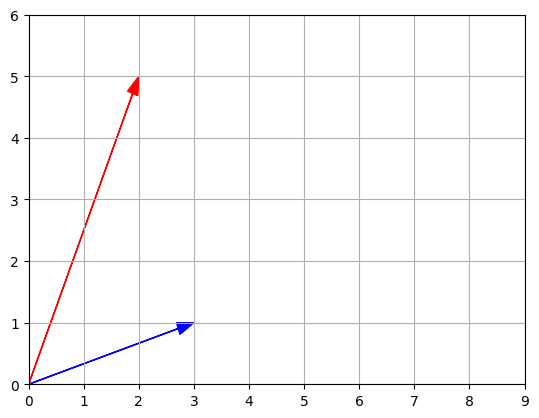

In [2]:
def plot_2d(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1], head_width=0.2, head_length=0.3, length_includes_head=True, **options)

plot_2d(u, color="r")
plot_2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()


表示三维向量

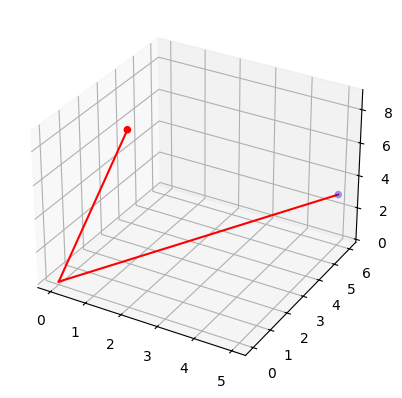

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])
x, y, z = zip(a, b)
subplot3d = plt.subplot(111, projection='3d')


def plot_3d(ax, vectors: list, z0=0, **option):
    for v in vectors:
        x, y, z = v
        ax.plot([0, x], [0, y], [z0, z], color="red")
    x_coors, y_coors, z_coors = zip(*vectors)
    ax.scatter(x_coors, y_coors, z_coors, **option)
subplot3d.set_zlim3d([0, 9])
plot_3d(subplot3d, [a, b], color=("r","b"))
plt.show()

向量的范数
有许多范数表示，最常见的是Euclidian norm 即L2范数
$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

In [4]:
import numpy as np
u = np.array([2, 5])
v = np.array([3, 1])
print(np.linalg.norm(u))

5.385164807134504


表示范数大小的圆

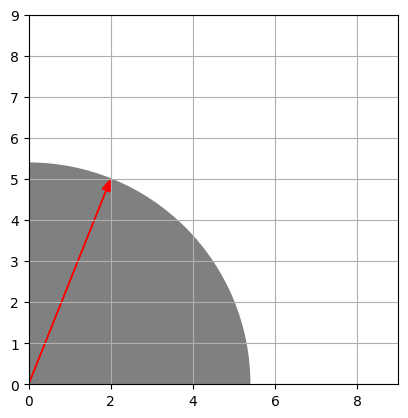

In [5]:
import matplotlib.patches as patches
radius = np.linalg.norm(u)
circle = patches.Circle((0, 0), radius, color="gray")
plt.gca().add_artist(circle)
plot_2d(u, color="red")
plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

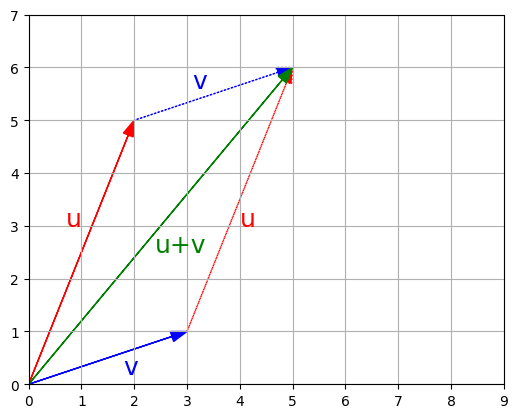

In [6]:
# 向量的加法
plot_2d(u, color="r")
plot_2d(v, color="b")
plot_2d(v, origin=u, color="b", linestyle="dotted")
plot_2d(u, origin=v, color="r", linestyle="dotted")
plot_2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

单位矢量

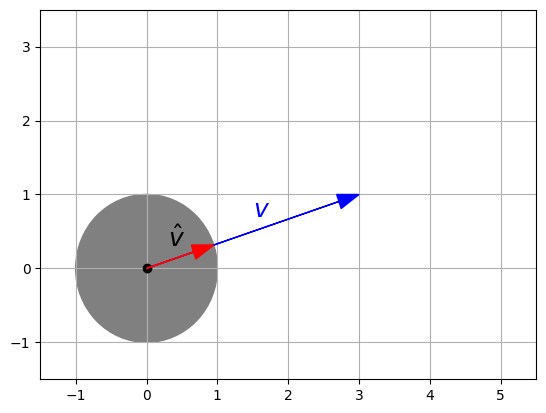

In [7]:
circle_unit = patches.Circle((0, 0), 1, color="gray")
plt.plot(0, 0, "ko")
plot_2d(v, color="b", zorder=5)
plot_2d(v / np.linalg.norm(v), color="r", zorder=10)
plt.gca().add_artist(circle_unit)
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

向量的点积

In [8]:
print(f"u v的点积是{np.dot(u, v)}")
print(f"u v的点积是{u.dot(v)}")

u v的点积是11
u v的点积是11


注意 "*" 符号实现的是逐元素相乘

In [9]:
print(f"*的作用{u * v}")

*的作用[6 5]


计算角度

In [10]:
def vector_angle(v1, v2):
    cos_theta = v1.dot(v2) / np.linalg.norm(v1) / np.linalg.norm(v2)
    return np.arccos(cos_theta.clip(-1, 1))


theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


NOTE: 注意：由于浮点误差较小，`cos_theta` 可能略微超出 $[-1, 1]$ 区间，这会导致 `arccos` 失败。这就是为什么我们使用 NumPy 的 `clip` 函数将值限制在范围内。

矩阵的讨论

In [11]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
print(A.shape)
print(A.size)

(2, 3)
6


矩阵的索引

In [12]:
print(A[1, 2])

60


In [13]:
print(A[:, 2])

[30 60]


In [14]:
print(A[1, :])

[40 50 60]


将索引得到的列向量或者行向量变为2维，索引方式有微小变换

In [15]:
print(A[:, 2:3])

[[30]
 [60]]


In [16]:
print(A[1:2, :])

[[40 50 60]]


创建对角阵

In [17]:
print(np.diag([1, 5, 9]))

# 提取已知矩阵的对角线元素
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
D_d = np.diag(D)
print(D_d)

[[1 0 0]
 [0 5 0]
 [0 0 9]]
[1 5 9]


单位阵

In [18]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


矩阵相乘

In [19]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = np.matmul(A, D)
print(E)
F = A @ D
print(F)

[[ 930 1160 1320 1560]
 [2010 2510 2910 3450]]
[[ 930 1160 1320 1560]
 [2010 2510 2910 3450]]


矩阵乘法满足分配律

In [20]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
Q = (A @ D) @ G

R = A @ (D @ G) 
print(Q)
print(R)

[[21640 28390 27320 31140 13570]
 [47290 62080 60020 68580 29500]]
[[21640 28390 27320 31140 13570]
 [47290 62080 60020 68580 29500]]


矩阵的转置
此不做代码说明 $(Q \cdot R)^T = R^T \cdot Q^T$.

In [21]:
print(A.T)
print(A.T.T)

[[10 40]
 [20 50]
 [30 60]]
[[10 20 30]
 [40 50 60]]


将1D转化为2D方法

In [22]:
# 将1D做转置无变化

u = np.array([2, 5])
print(u.T)

[2 5]


In [23]:
u_row = np.array([u])
print(u_row)

[[2 5]]


In [24]:
print(u[np.newaxis, :])

[[2 5]]


In [25]:
print(u[np.newaxis])

[[2 5]]


### 因为None指的是newaxis,但是不推荐使用，因为不明确

In [26]:
print(u[None])

[[2 5]]


现在来看他的转置

In [27]:
print(u_row.T)

[[2]
 [5]]


相比于将u转化为2D行向量在转置，可以直接创建列向量

In [28]:
print(u[:, np.newaxis])

[[2]
 [5]]


# 矩阵的可视化

#### 既然向量可以表示为点或箭头，那么矩阵呢？？,我们可以表示为多个许多点

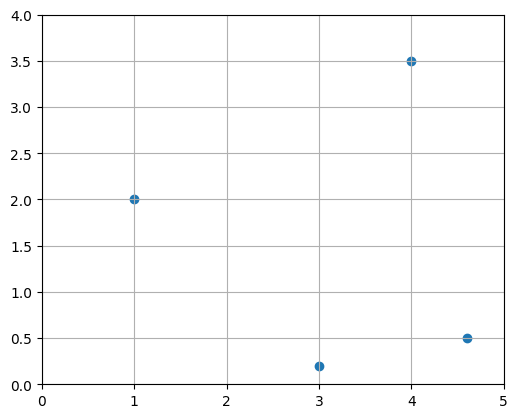

In [29]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x=x_coords_P, y=y_coords_P)
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

由于向量是有序的，你可以将矩阵视为一条路径，并用连通点表示它：

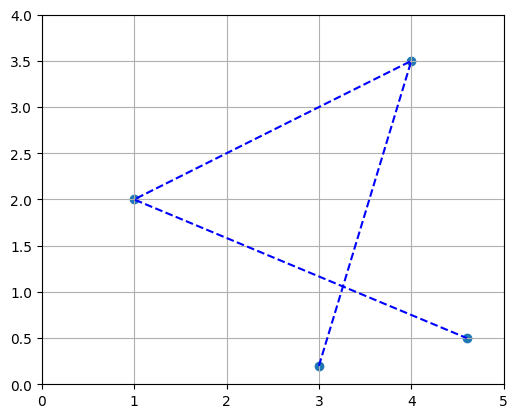

In [30]:
plt.scatter(x=x_coords_P, y=y_coords_P)
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

将他们表示为多边形，
## 以下绘图操作可参见绘图库教程

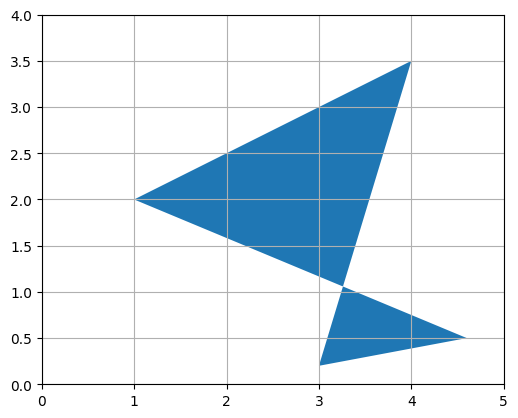

In [31]:
from matplotlib.patches import Polygon
# 参数为 n * 2大小的矩阵，所以转置，绘制多边形
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

矩阵运算具有非常有用的几何应用。
首先，将两个矩阵相加相当于将它们的所有向量相加，表示多次平移

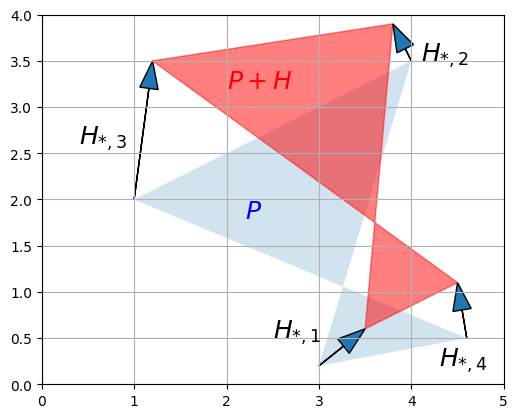

In [32]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.5, color="r"))
# 注意zip对矩阵的操作
for vector, origin in zip(H.T, P.T):
    plot_2d(vector, origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.3, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

如果每个向量都平移相同的方向和距离，即平移矩阵中的向量完全相同

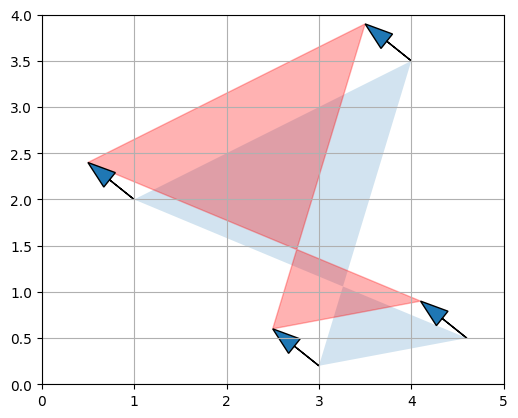

In [33]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
# 以原各向量为起点，绘制H.T向量
for vector, origin in zip(H2.T, P.T):
    plot_2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

标量乘矩阵后的几何变换

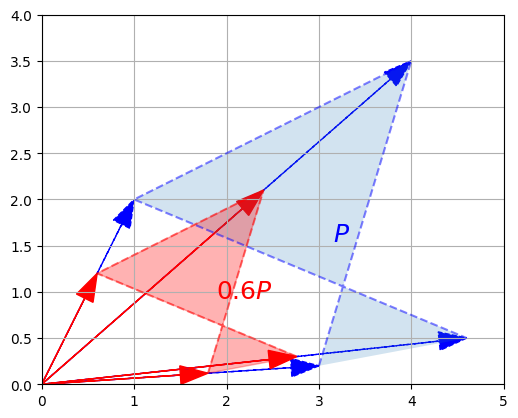

In [34]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            # 向量和多边形的绘制
            plot_2d(vector_before, color="blue", linestyle="--")
            plot_2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.plot(P_before[0], P_before[1], "b--", alpha=0.5)
    plt.plot(P_after[0], P_after[1], "r--", alpha=0.5)
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.gca().set_aspect("equal")
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

将矩阵投影到一条线上，最终我们得到的是那条线上的点的坐标

In [35]:
"""
重新写一遍P，避免遗忘
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])"""

'\n重新写一遍P，避免遗忘\nP = np.array([\n        [3.0, 4.0, 1.0, 4.6],\n        [0.2, 3.5, 2.0, 0.5]\n    ])'

[[3.  4.  1.  4.6]]


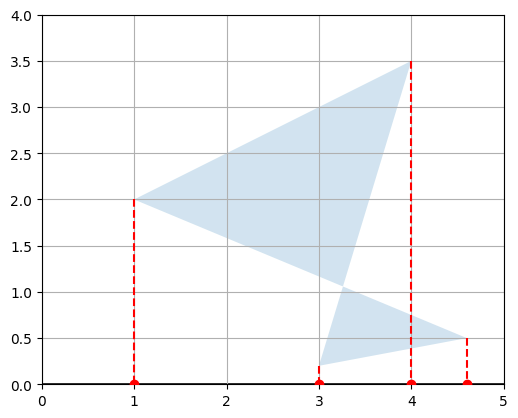

In [36]:
# 定义U向量
U = np.array([[1, 0]])
res = U @ P
# P中向量在水平轴上的坐标
print(res)

# 进行投影
def plot_projection(u_pro, matrix):
    after_pro = u_pro @ matrix
    
    # 绘制投影方向
    axis_end = 100 * u_pro
    plot_2d(axis_end[0], color="black")
    
    # 绘制原有矩阵
    plt.gca().add_artist(Polygon(matrix.T, alpha=0.2))
    
    for vector, proj_coordinate in zip(matrix.T, after_pro.T):
        # 模长乘以单位方向向量，得到投影坐标
        proj_point = proj_coordinate * u_pro
        # 画出在方向向量上的点
        plt.plot(proj_point[0][0], proj_point[0][1], "ro", zorder=10)
        # 画出投影虚线
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]],
                 "r--", zorder=10)

    plt.axis([0, 5, 0, 4])
    plt.gca().set_aspect("equal")
    plt.grid()
    plt.show()

plot_projection(U, P)

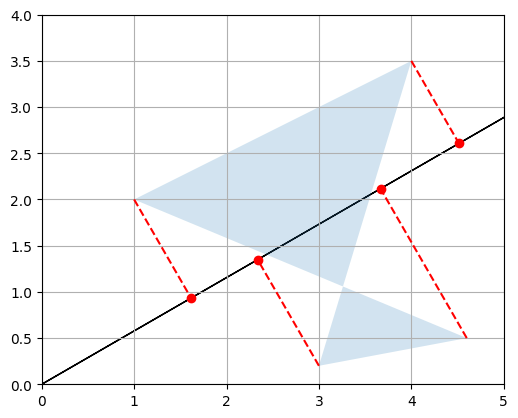

In [37]:
# 假如方向向量有一定角度呢？？
angle30 = 30 * np.pi / 180
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])
plot_projection(U_30, P)

总结就是：单位向量和矩阵的点积基本上是在轴上执行投影，并给出结果点在该轴上的坐标。

## 那么矩阵和矩阵相乘呢？？
创建一个矩阵，包括2个单位向量，其中一个是30度，应该是120度

In [38]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
print(V)

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


将V与P相乘会有什么效果？？ 让我们画出来

In [39]:
print(V @ P)

[[ 2.69807621  5.21410162  1.8660254   4.23371686]
 [-1.32679492  1.03108891  1.23205081 -1.8669873 ]]


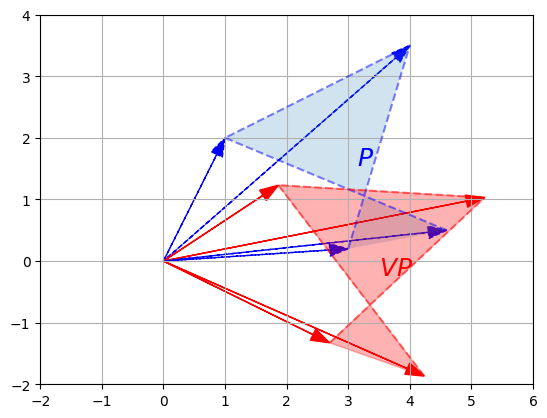

In [40]:
P_rotated = V @ P
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

## 思考
如何思考？？
将V矩阵视为一个列向量，大小为2*1大小，第一行为旋转了30度的单位向量，第二行为旋转了120度的单位向量。

将P试做一个一个列向量，大小为1*4

相乘结果是2*4大小的矩阵，第一行为矩阵新向量的X坐标（大小为点积结果），第二行为Y坐标。总体效果为旋转了 -30度

事实上，旋转矩阵的行列式为1

## 除了反射和旋转变换，还有其他变换吗？？

#### 介绍剪切变换(shear mapping)和挤压变换(squeeze mapping)


[[0.  1.5 2.5 1. ]
 [0.  1.  1.  0. ]]


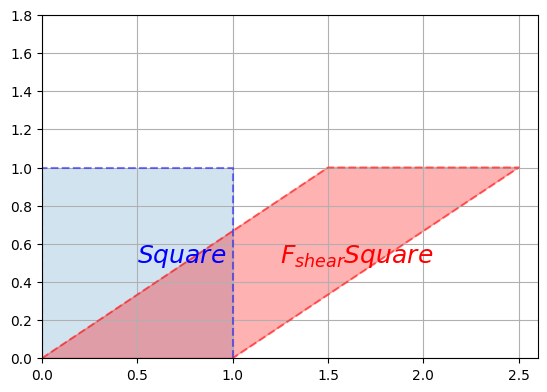

In [41]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
Square = np.array([
    [0, 0, 1, 1],
    [0, 1, 1, 0]
    ])
print(F_shear @ Square)
plot_transformation(Square, F_shear @ Square, "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()


挤压变换(squeeze mapping)

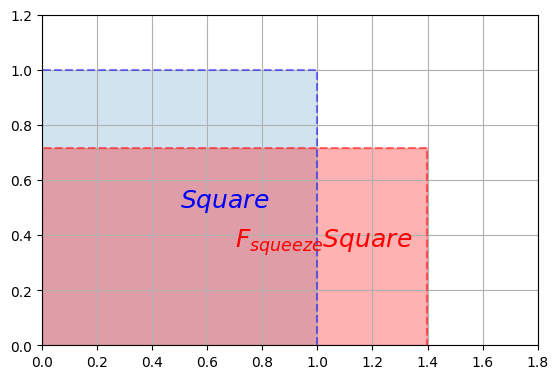

In [42]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(Square, F_squeeze @ Square, "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

最后在来看反射变换

[[3.  4.  1.  4.6]
 [0.2 3.5 2.  0.5]]


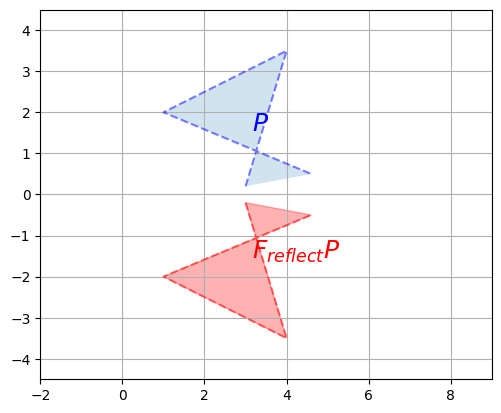

In [43]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])

plot_transformation(P, F_reflect @ P, "$P$", "$F_{reflect} P$",
                    axis=[-2, 9, -4.5, 4.5])
# 防止忘记P，在打印一下
print(P)
plt.show()

我们能否给定一个变换，使得该变换可以反转给定矩阵变换的效果？ 答案就是他们的逆矩阵,以剪切变换举例子

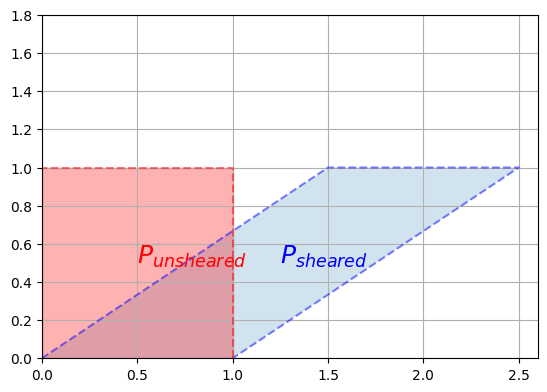

In [44]:
F_inv_shear = np.linalg.inv(F_shear)
P_sheared = F_shear @ Square
plot_transformation(P_sheared, F_inv_shear @ P_sheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

In [45]:
print(P)

[[3.  4.  1.  4.6]
 [0.2 3.5 2.  0.5]]


对于某些方阵(非方阵无法求逆，线性变换会丢失信息，比如将3D物体投影到2D，用一个2*3矩阵乘以一个3*3矩阵)，进行线性变换之后会丢失信息，并且无法复原(无逆矩阵)，为奇异矩阵

In [46]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
try:
    np.linalg.inv(F_project)
except np.linalg.LinAlgError as e:
    print("LinAlgError:", e)


LinAlgError: Singular matrix


但是，对于某些奇异矩阵，inv函数还是计算出了逆(由于浮点误差)
观察到结果很大

In [47]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
print(np.linalg.inv(F_project_30))

[[ 1.20095990e+16 -2.08012357e+16]
 [-2.08012357e+16  3.60287970e+16]]


还有一种特别的矩阵，对合矩阵，即自身是自身的逆矩阵

[[-0.  -2. ]
 [-0.5 -0. ]]


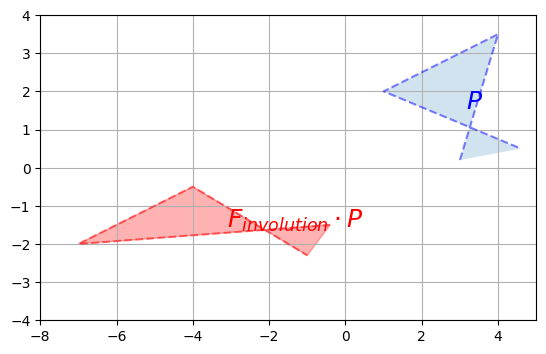

In [48]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
print(np.linalg.inv(F_involution))

plot_transformation(P, F_involution @ P, "$P$", r"$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

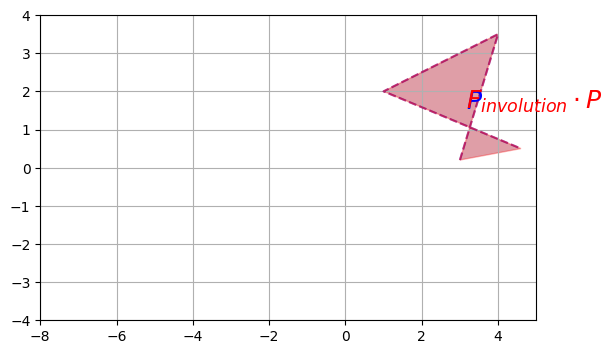

In [49]:
# 再次进行F_involution变换返回原来的状态
plot_transformation(P, F_involution @ F_involution @ P, "$P$", r"$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

## 正交矩阵
可以是旋转反射的组合，但是没有剪切，挤压操作

In [50]:
print(F_involution @ F_involution)

[[1. 0.]
 [0. 1.]]


行列式

In [51]:
# 用det函数计算
import numpy.linalg as LA
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
print(LA.det(M))

27.0


方阵行列式为0则不可以求逆，反之可以

In [55]:
print(LA.det(F_involution))
print(LA.det(F_shear))
print(LA.det(F_project_30))

-1.0
1.0
2.0816681711721642e-17



行列式还可用于测量线性变换对表面积的影响程度：例如，投影矩阵 $F_{project}$ 和 $F_{project\_30}$ 完全压平多边形 $P$，直到其面积为零。这就是为什么这些矩阵的行列式为 0。剪切映射修改了多边形的形状，但没有影响其表面积，这就是为什么行列式为 1。您可以尝试计算旋转矩阵的行列式，您也应该会发现 1。缩放矩阵呢？让我们看看：

[[3.  4.  1.  4.6]
 [0.2 3.5 2.  0.5]]


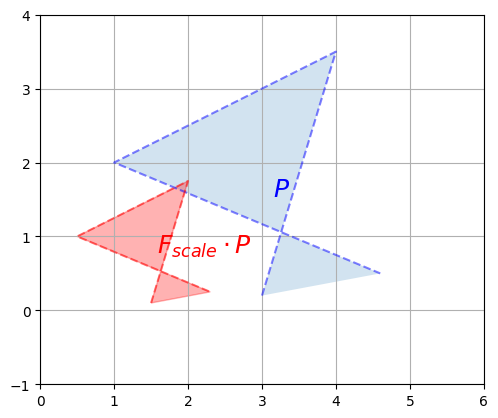

In [57]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
print(P)
plot_transformation(P, F_scale @ P, "$P$", r"$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

我们在垂直轴和水平轴上将多边形缩放 1/2，因此生成的多边形的表面积是原始多边形的 1/4。让我们计算行列式并检查：

In [58]:
print(LA.det(F_scale))

0.25


如何理解缩放效果？？
将P矩阵的行视为2个行向量，第一行为X轴坐标，第二行为Y轴坐标，则结果矩阵为第一行为0.5*X，第二行为0.5*Y的2*4矩阵

当变换导致原始多边形“翻转”时（例如，左手手套变成右手手套），行列式实际上可以为负数。例如，`F_reflect` 矩阵的行列式为 -1，因为表面积得以保留，但多边形被翻转：

In [60]:
print(F_reflect)
print(LA.det(F_reflect))


[[ 1  0]
 [ 0 -1]]
-1.0


## 组合线性变换

只需连续执行多个点积，即可将多个线性变换串联起来。例如，要执行挤压映射，然后执行剪切映射，只需编写：

In [ ]:
P_squeezed_then_sheared = F_shear @ F_squeeze @ P


请注意，变换的顺序与点积顺序相反。
如果我们要多次执行这种线性变换的组合，我们不妨像这样保存组合矩阵：

In [ ]:
F_squeeze_then_shear = F_shear @ F_squeeze
P_squeezed_then_sheared = F_squeeze_then_shear @ P

当要undo操作时，乘以逆矩阵就可以了

## 奇异值分解！

奇异值分解
事实证明，任何 $m \times n$ 矩阵 $M$ 都可以分解为三个简单矩阵的点积：
* 旋转矩阵 $U$（$m \times m$ 正交矩阵）(称为左奇异向量)
* 缩放和投影矩阵 $\Sigma$（$m \times n$ 对角矩阵）
* (对角线元素称为奇异值，奇异值可以为0)
* 另一个旋转矩阵 $V^T$（$n \times n$ 正交矩阵）(称为右奇异向量)

$M = U \cdot \Sigma \cdot V^{T}$

例如，让我们分解剪切变换：

In [62]:
print(F_shear)
U, S_diag, V_T = LA.svd(F_shear)
print(f"U矩阵是{U}")
print(f"S_diag矩阵是{S_diag}")
print(f"V.T矩阵是{V_T}")

[[1.  1.5]
 [0.  1. ]]
U矩阵是[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
S_diag矩阵是[2.  0.5]
V.T矩阵是[[ 0.4472136   0.89442719]
 [-0.89442719  0.4472136 ]]


注意：此时的S_diag只是对角线的值(奇异值)，要得到完整的Σ，创建对角矩阵

In [63]:
S = np.diag(S_diag)
print(S)

[[2.  0. ]
 [0.  0.5]]


检查奇异值分解

In [64]:
print(U @ np.diag(S_diag) @ V_T)
print(F_shear)

[[ 1.00000000e+00  1.50000000e+00]
 [-1.25949234e-17  1.00000000e+00]]
[[1.  1.5]
 [0.  1. ]]


让我们逐一把这些矩阵作用于Square上，观察效果

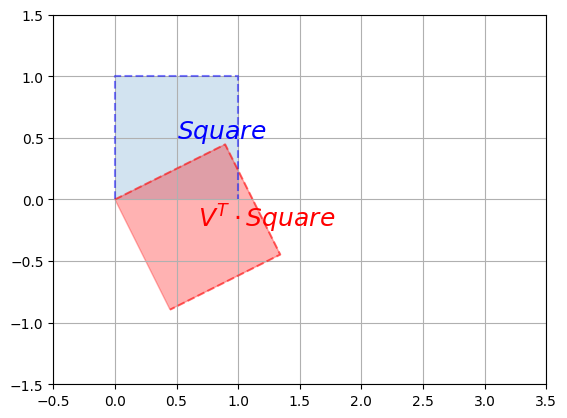

In [65]:
# 第一次旋转
plot_transformation(Square, V_T @ Square, "$Square$", r"$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

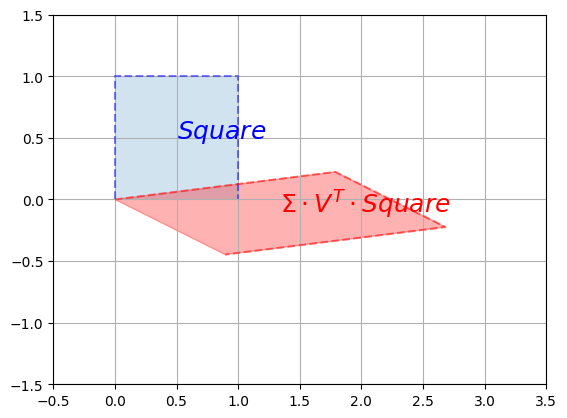

In [68]:
# 缩放，此时无投影
plot_transformation(Square, S @ V_T @ Square,
                    r"$Square$",
                    r"$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

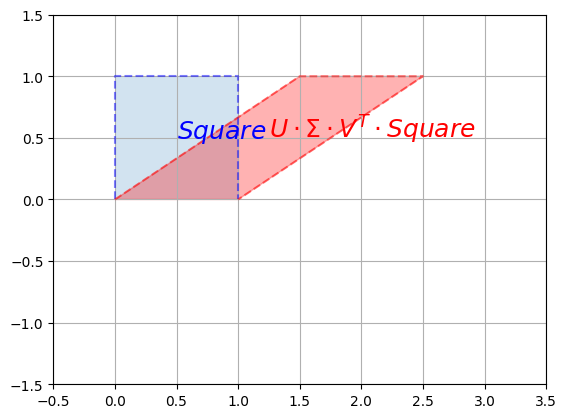

In [69]:
# 再次旋转，总效果于F_shear 相同
plot_transformation(Square, U @ S @ V_T @ Square,
                    r"$Square$",
                    r"$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

## 特征值和特征向量

方阵 $M$ 的 **特征向量**（也称为 **特征向量**）是一个非零向量，它在通过与 $M$ 相关的线性变换进行变换后仍保持在同一直线上。更正式的定义是任何向量 $v$，满足：

$M \cdot v = \lambda \times v$

其中 $\lambda$ 是一个标量值，称为与向量 $v$ 相关的 **特征值**。

我们可以观察变换后向量的方向变化来看出特征向量

NumPy 的 `eig` 函数返回任何方阵的单位特征向量及其对应特征值的列表。让我们看看挤压映射矩阵 $F_{squeeze}$ 的特征向量和特征值：

In [71]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
print(eigenvalues) # [λ0, λ1, …]
print(eigenvectors) # [v0, v1, …]

[1.4        0.71428571]
[[1. 0.]
 [0. 1.]]


我们会发现任何水平或垂直向量都会保持其方向（尽管其长度会发生变化），因此所有水平和垂直向量都是 $F_{squeeze}$ 的特征向量。
确实，水平向量被拉伸了 1.4 倍，而垂直向量则缩小了 1/1.4=0.714

让我们看看剪切映射矩阵 $F_{shear}$：

In [75]:
eig, eigenvector = LA.eig(F_shear)
print(F_shear)
print(eig)
print(eigenvector)

[[1.  1.5]
 [0.  1. ]]
[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.48029737e-16]]


为什么会是这样的结果？？，从几何上我们预测，特征值是1，特征向量是[1, 0]且只有一个，(因为X轴向量长度方向都没变，其他所有方向的向量方向都改变)，但是现在却有了[-1, 0]方向，这是由于浮点错误造成的。我们可以安全地忽略（几乎）共线（即在同一条线上）的向量。

## 矩阵的迹(trace)
对角线上的和

In [76]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
print(D.trace())

123


迹没有简单的几何解释（一般来说），但它有许多属性，使其在许多领域都很有用：
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
* …